In [28]:
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:
def f(x):
    return 3.0 * x ** 3+x-3

In [30]:
def df(x):
    return 9.0*x**2+1

In [31]:
def g(x):
    return ((3.0 - x) / 3.0) ** (1.0 / 3.0)

In [32]:
def dg(f):
    return -1.0 / 9.0 * (3.0 / (3.0 - x)) ** (2/3)

In [33]:
def dg(f):
    return -1.0 / 9.0 * (3.0 /  (3.0 - x ))** (2/3)

In [40]:
def Bisect(xl, xu, es, imax):
    xr = 0.0
    x = []; e=[]; it = []
    for i in range(imax):
        xrold = xr
        xr = 0.5 * (xl + xu)
        if(xr != 0.0):
            ea = abs((xr - xrold) / xr)*100
        it.append(i); x.append(xr); e.append(ea)
        test = f(xl) * f(xr)
        if (test < 0.0):
            xu = xr
        elif (test>0.0):
            xl = xr
        else:
            ea = 0.0
        if(ea < es):
            break 
    return it, x
i1, x1, e1 = Bisect(0,1, 1e-12, 100)
plt.plot(i1, e1, label="Bisect");


plt.legend()
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

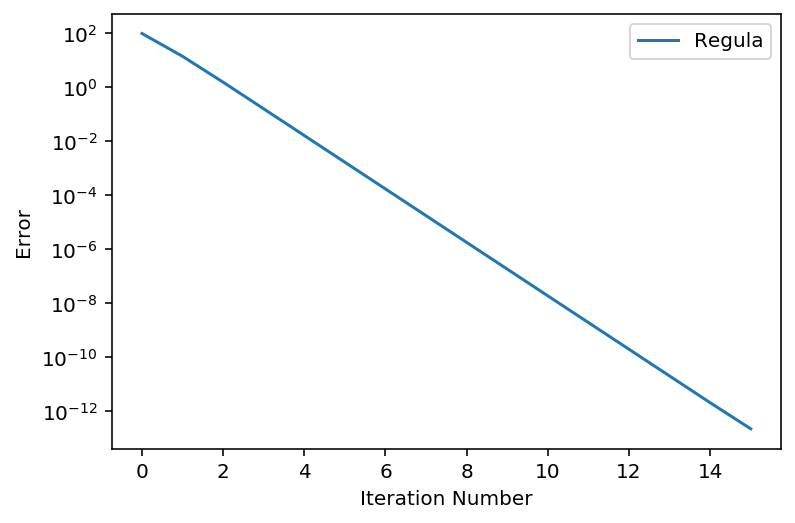

In [35]:
def RF(xl, xu, es, imax):
    xr = 0.0
    x=[]; e=[]; it=[]
    for i in range(imax): 
        xrold = xr
        xr = xu - f(xu) * (xl-xu) / (f(xl) - f(xu))
        if(xr != 0.0):
            ea = abs((xr-xrold)/xr)*100
        it.append(i); x.append(xr); e.append(ea)
        test = f(xl) * f(xr)
        if ( test< 0.0):
            xu = xr
        elif(test>0.0):
            xl = xr
        else:
            ea = 0.0
        if(ea<es):
            break
    return it, x, e

    
i2, x2, e2 = RF(0,1, 1e-12, 100)
plt.plot(i2, e2, label="Regula");
    
    
plt.legend()
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

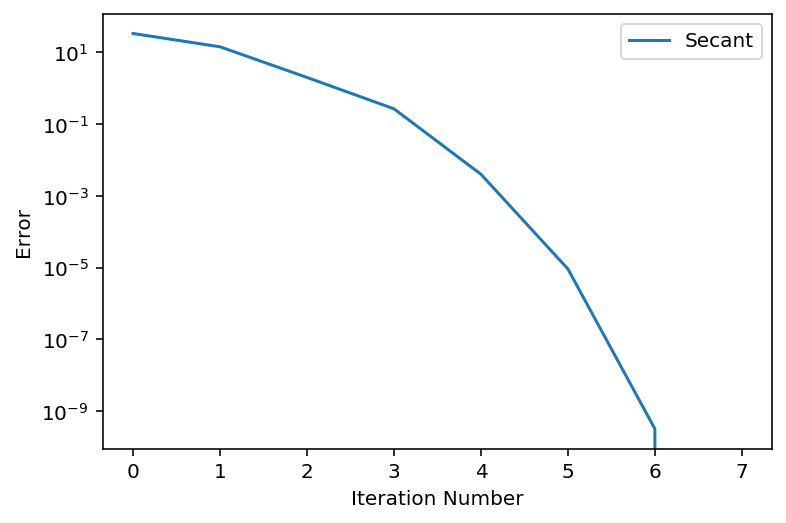

In [36]:
def NR(x0, es , imax):
    xr = x0
    x=[];e=[];it=[]
    for i in range(imax):
        xrold = xr
        xr = xrold-f(xrold) / df(xrold)
        if ( xr !=0):
            ea = abs((xr-xrold)/xr)*100
        it.append(i); x.append(xr); e.append(ea)
        if(ea<es):
            break
    return it, x, e

i4, x4, e4 = NR(0, 1e-12, 100)
plt.plot(i3, e3, label="Secant");

plt.legend()
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

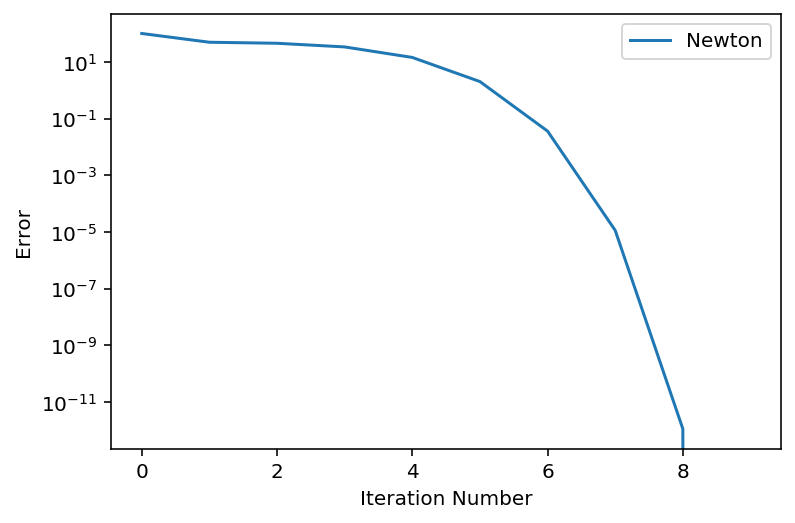

In [37]:
def Secant(x0, xl, es, imax):
    x=[];e=[];it=[];
    for i in range(imax):
        if f(xl) - f(x0) == 0:
            return xl
        xr = xl - (f(xl) * (xl-x0) * 1.0) / (f(xl) - f(x0));
        x0  = xl; xl = xr
        if(xr!=0):
            ea = abs((xr-x0) / xr) * 100
        it.append(i); x.append(xr); e.append(ea)
        if(ea<es):
            break
    return it, x, e
i3, x3, e3 = Secant(0,1, 1e-12, 100)
plt.plot(i4, e4, label="Newton");

plt.legend()
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.yscale('log')
plt.show()